<a href="https://colab.research.google.com/github/shagufi-enam/E-commerce/blob/main/Walmart_confidence_Interval_and_CLT_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Case: Walmart - Confidence Interval and CLT

About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [3]:
#Import the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the Walmart data:

df = pd.read_csv("/content/walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [13]:
df.shape

(550068, 10)

Above dataset contain 550068 rows and 10 columns.

In [11]:
#Checking missing values:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no null and missing value in this dataset.

In [14]:
#Checking the descriptive statistics  of the data:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


If we didn't pass any arguments in the describe it'll only return statistics for the numeric features

The average purchase is 9263.96 and the maximum purchase is 23961, so the average value is sensitive to outliers, but the fact that the mean is so small compared to the maximum value indicates the maximum value is an outlier.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [16]:
# Changing datatype int64 to object
columns = ['Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [18]:
df.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


Observation post modifying the categorical variable's data type:

1. There are 3631 unique product_id, andproduct_id 550068 being with the highest count.
2. The customers belongs to 21 distinct occupation for the purchases being made with Occupation 4 being the highest.
3. Marital status unmarried contribute more in terms of the count for the purchase.
4. There are 20 unique product categories with 5 being the highest.
5.The top people purchasing are in the age range of 26–35.
6. Males are top in purchasing.

# Non-Graphical Analysis: Value counts and unique attributes

In [19]:
df["Gender"].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [20]:
df["Age"].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

In [21]:
df["Marital_Status"].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

In [22]:
 df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

Stay_In_Current_City_Years
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: proportion, dtype: float64

# Insights :
1) 75% of users are male and 25% are female.

2) Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%,
and very low users ages ( 0–17 & 55+ )are 5%.

3) 35% stay in a city for 1 year, 18% stay in a city for 2 years, 17% stay in a city for 3 years,
and 15% stay in a city for more than 4 years.

4)60% users are unmarried and 40% users are married.

Unique attributes

In [23]:
unique_category= df['Product_Category'].nunique()
unique_category

20

In [25]:
unique_City_Category_count = df['City_Category'].nunique()
unique_City_Category_count

3

In [26]:
unique_Product_ID_count = df['Product_ID'].nunique()
unique_Product_ID_count

3631

In [30]:
unique_User_ID_count=df["User_ID"].nunique()
unique_User_ID_count

5891

In [24]:
df.groupby('Gender')['User_ID'].nunique()


Gender
F    1666
M    4225
Name: User_ID, dtype: int64

# Insights :
1) The total product category count is 20 unique products.

2) The total number of unique city categories is three.

3) The total number of unique product IDs is 3631.

4) The total number of unique user IDs is 5891.

5)the total number male user is 4225 who is purchasing product and 1666 female.

In [31]:
df.groupby("Marital_Status")["User_ID"].nunique()


Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [ ]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


Observation:
    
    1. We have seen earlier that city category B and A constitutes less percentage of total population,
     but they contribute more towards purchase count.

    We can see from above results large percentage of customers aged 26-35 for B(40%) and
    A (50%) which can be the reason for these city categories to be more actively purchasing.

# Visual Analysis - Univariate & Bivariate

Univariate Analysis

<Axes: xlabel='Purchase', ylabel='Count'>

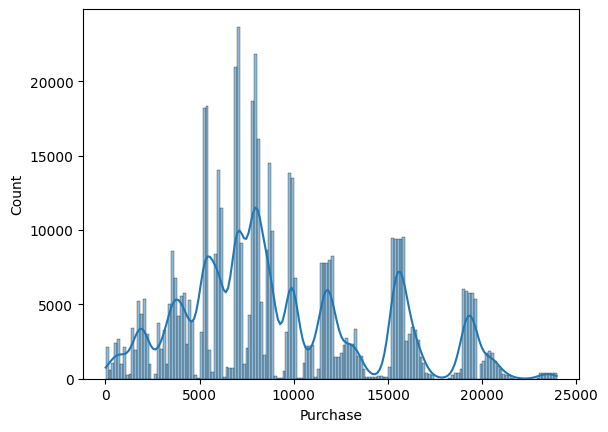

In [36]:
sns.histplot(data=df,x="Purchase",kde=True)

We can see purchase value between 5000 and 10000 have higher count.
 From the initial observation we have already seen the mean and median is 9263 and 8047 respectively.
 Also, we can see there are outliers in the data.

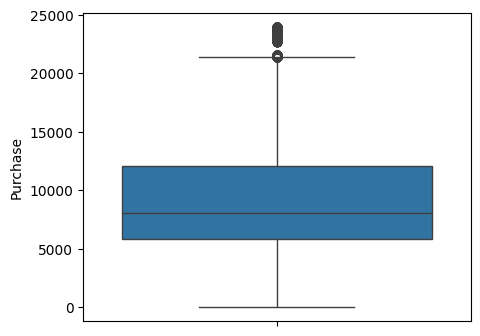

In [39]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='Purchase')
plt.show()

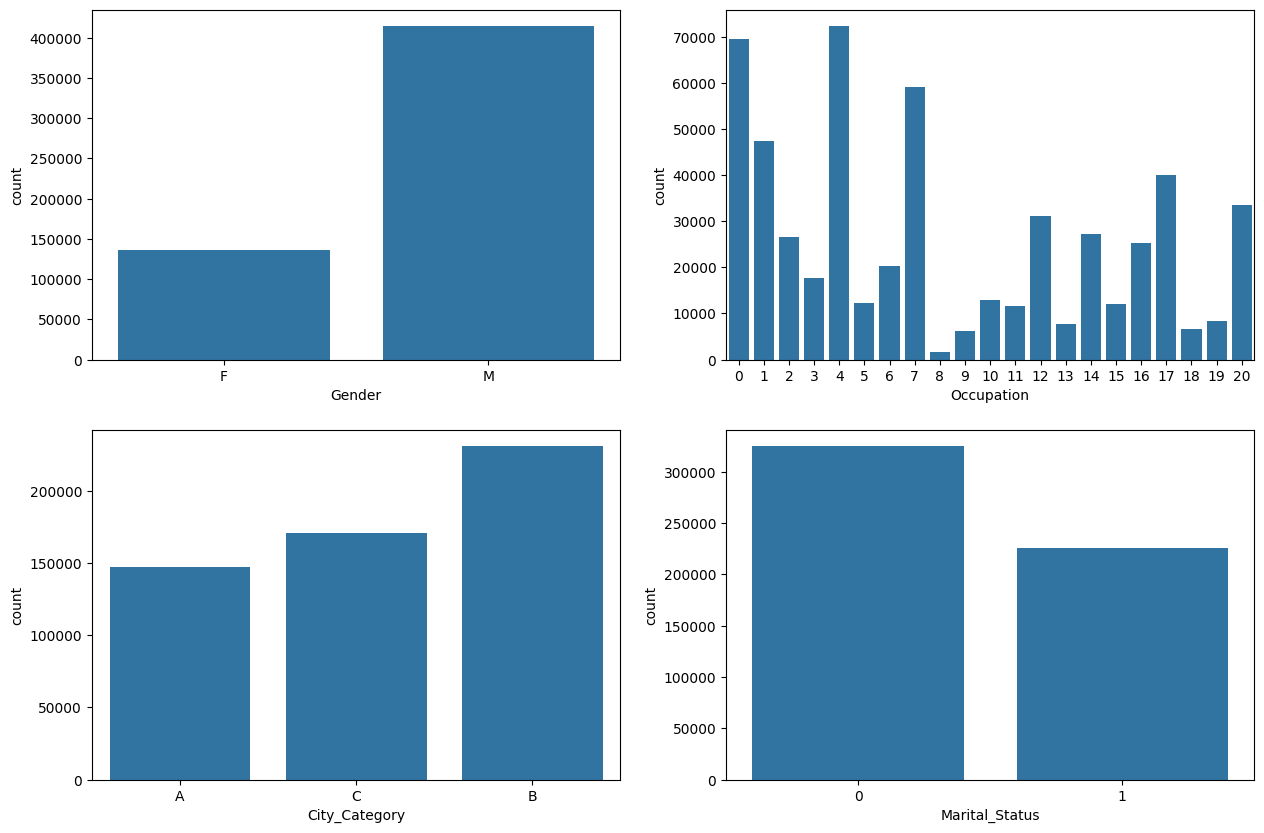

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

 We can clearly see from the graphs above the purchases done by males are much higher than females.
2. We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
3. The purchases are highest from City category B.
4. Single customer purchases are higher than married users.

# Bivariate Analysis

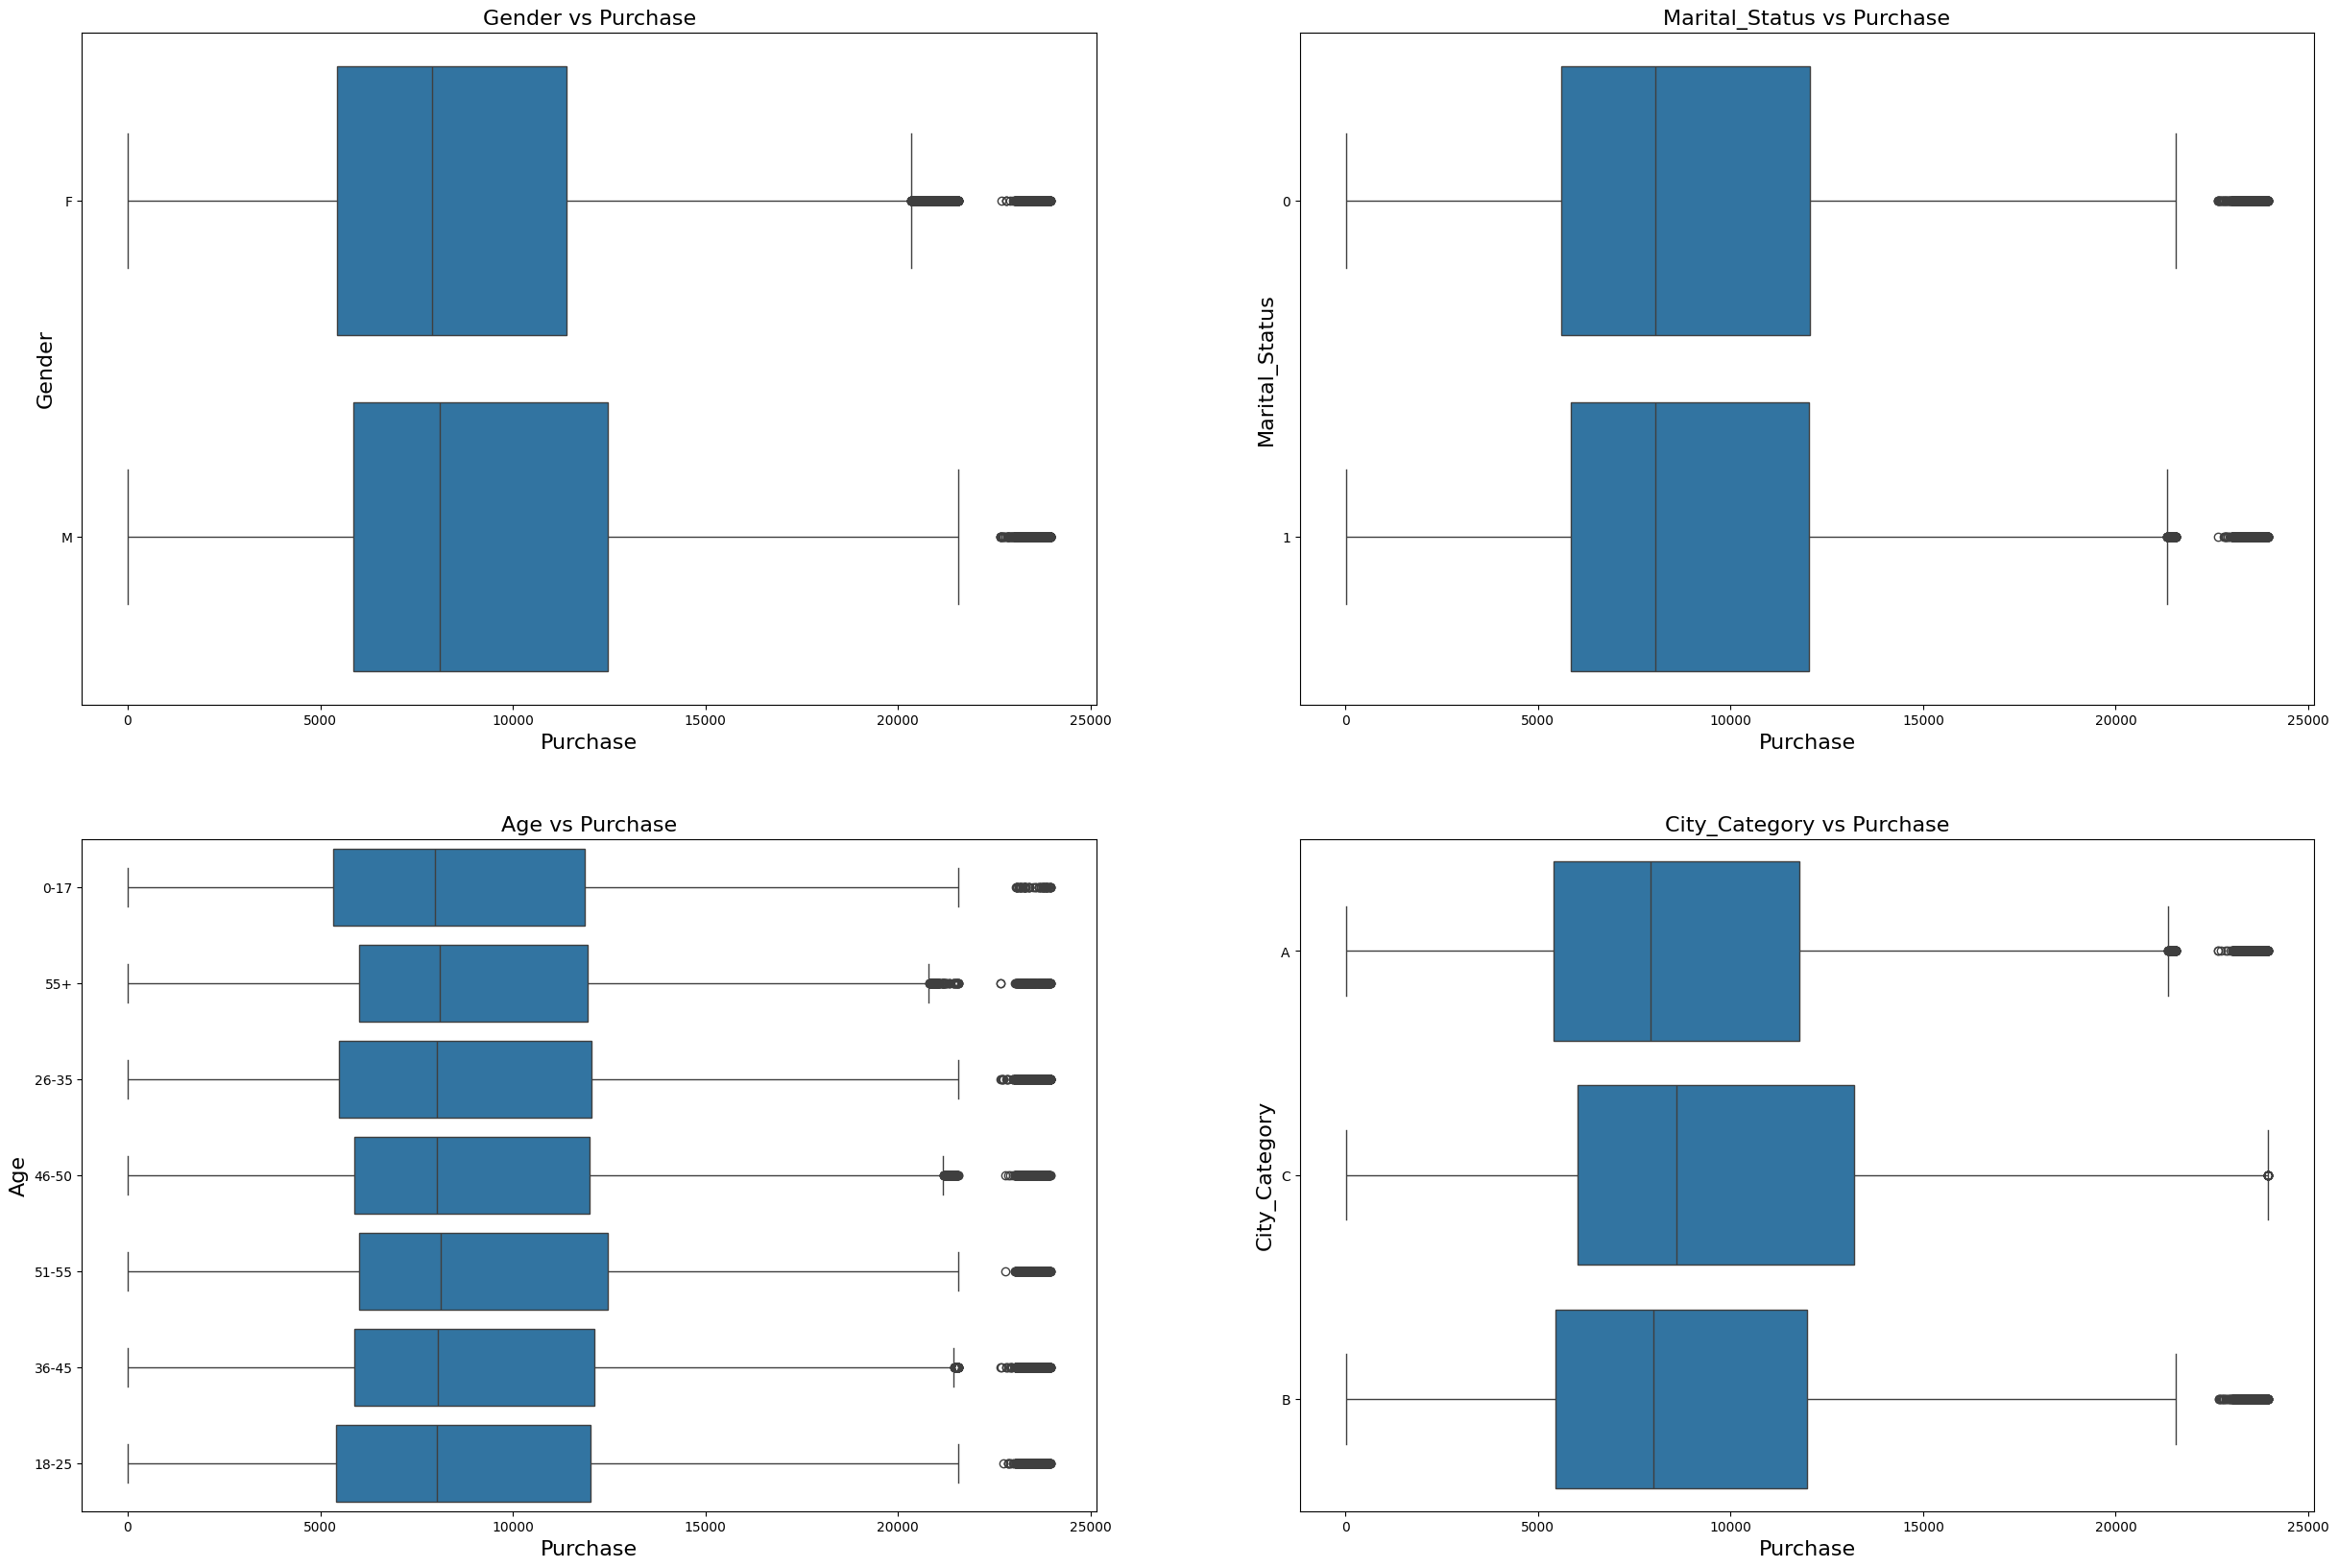

In [42]:
fig1, axs=plt.subplots(nrows=2,ncols=2, figsize=(30,20))

sns.boxplot(data=df, y='Gender',x ='Purchase',orient='h',ax=axs[0,0])
axs[0,0].set_title("Gender vs Purchase", fontsize=16)
axs[0,0].set_xlabel("Purchase", fontsize=16)
axs[0,0].set_ylabel("Gender", fontsize=16)

sns.boxplot(data=df, y='Marital_Status',x ='Purchase',orient='h',ax=axs[0,1])
axs[0,1].set_title("Marital_Status vs Purchase", fontsize=16)
axs[0,1].set_xlabel("Purchase", fontsize=16)
axs[0,1].set_ylabel("Marital_Status", fontsize=16)

sns.boxplot(data=df, y='Age',x ='Purchase',orient='h',ax=axs[1,0])
axs[1,0].set_title("Age vs Purchase", fontsize=16)
axs[1,0].set_xlabel("Purchase", fontsize=16)
axs[1,0].set_ylabel("Age", fontsize=16)

sns.boxplot(data=df, y='City_Category',x ='Purchase',orient='h',ax=axs[1,1])
axs[1,1].set_title("City_Category vs Purchase", fontsize=16)
axs[1,1].set_xlabel("Purchase", fontsize=16)
axs[1,1].set_ylabel("City_Category", fontsize=16)
plt.show()

1) Gender vs. Purchase

a) The median for males and females is almost equal.

b) Females have more outliers compared to males.

 c) Males purchased more compared to females.

2) Martial Status vs. Purchase

  a) The median for married and single people is almost equal.
  
   b) Outliers are present in both records.
   
3) Age vs. Purchase

  a) The median for all age groups is almost equal.

  b) Outliers are present in all age groups.

4) City Category vs. Purchase

   a) The C city region has very low outliers compared to other cities.

   b) A and B city region medians are almost the same.

In [33]:
#Checking how genders are contributing towards toatl purchase amount
df.groupby('Gender')['Purchase'].describe()



,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


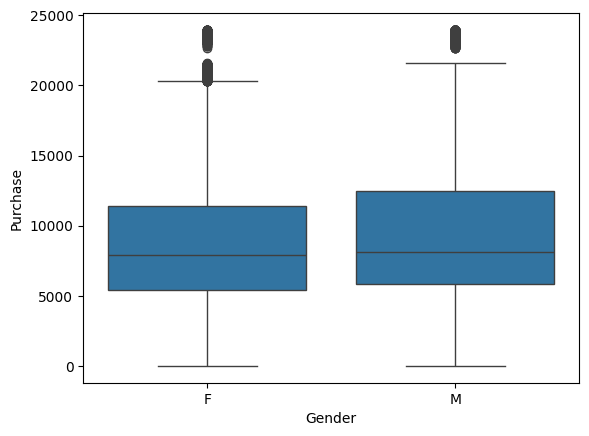

In [43]:
#Genderwise spending on product
sns.boxplot (x='Gender', y='Purchase', data=df)

plt.show()

<Axes: xlabel='Purchase', ylabel='Count'>

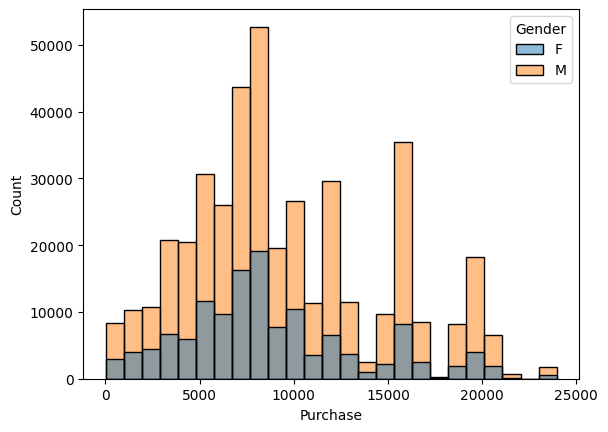

In [46]:
sns.histplot(x='Purchase', data=df, bins=25, hue='Gender')

In [48]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [50]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


Are women spending more money per transaction than men? Why or Why not?

In [52]:
df.groupby("Gender")["Purchase"].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [48]:
n=500
iteration=1000
male_sample_mean=[df[df["Gender"]=="M"].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(male_sample_mean)

9437.042166000001

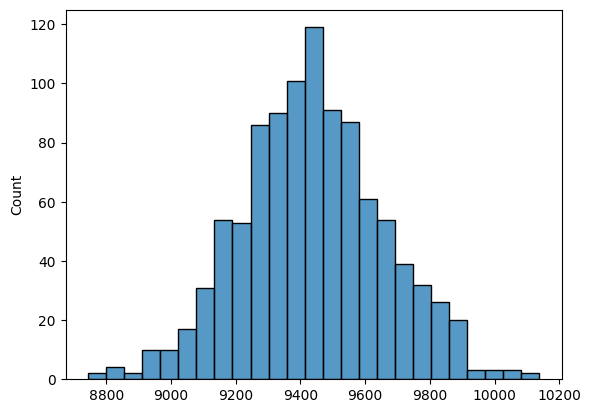

In [51]:
sns.histplot(male_sample_mean)
plt.show()

In [44]:
n=500
iteration=1000
female_sample_mean=[df[df["Gender"]=="F"].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(female_sample_mean)

8733.004583999998

<Axes: ylabel='Count'>

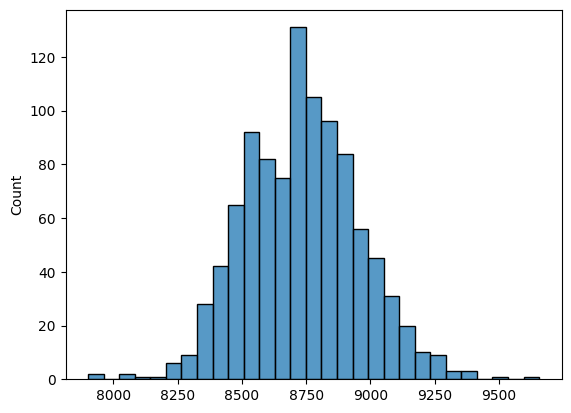

In [45]:
sns.histplot(female_sample_mean)

In [52]:
# calculate the confidence interval - 95%
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

male_lower_range = np.mean(male_sample_mean) - 1.96 * np.std(male_sample_mean)
male_upper_range=np.mean(male_sample_mean) + 1.96 * np.std(male_sample_mean)

In [53]:
(male_lower_range,male_upper_range)

(9010.324863409867, 9863.759468590135)

In [54]:
female_lower_range = np.mean(female_sample_mean) - 1.96 * np.std(female_sample_mean)
female_upper_range = np.mean(female_sample_mean) + 1.96 * np.std(female_sample_mean)

In [55]:
(female_lower_range, female_upper_range)


(8298.946412945363, 9167.062755054634)

from above analysis of CLT .male CLT range is overlapping with female CLT range.so no overlapping between male and female will change the confidence level

In [ ]:
# At 90% confidence level

In [63]:
male_lower_range = np.mean(male_sample_mean) - 1.645 * np.std(male_sample_mean)
male_upper_range=np.mean(male_sample_mean) + 1.645* np.std(male_sample_mean)

In [64]:
(male_lower_range,male_upper_range)

(9078.904429897566, 9795.179902102436)

In [65]:
female_lower_range = np.mean(female_sample_mean) - 1.645 * np.std(female_sample_mean)
female_upper_range = np.mean(female_sample_mean) + 1.645 * np.std(female_sample_mean)

In [66]:
(female_lower_range, female_upper_range)

(8368.705761864858, 9097.303406135139)

At 90% confidence level there is no overlapping .its conclude that males spend more amount.

In [71]:
#At 99% confidence level
male_lower_range = np.mean(male_sample_mean) - 2.57 * np.std(male_sample_mean)
male_upper_range=np.mean(male_sample_mean) + 2.57 * np.std(male_sample_mean)

In [72]:
(male_lower_range,male_upper_range)

(8877.51998862416, 9996.564343375841)

In [73]:
female_lower_range = np.mean(female_sample_mean) - 2.57 * np.std(female_sample_mean)
female_upper_range = np.mean(female_sample_mean) +2.57* np.std(female_sample_mean)

In [74]:
(female_lower_range, female_upper_range)

(8163.856880117133, 9302.152287882864)

Results when the same activity is performed for Married vs Unmarried

In [91]:
df.groupby("Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [94]:
#At 95% confidence level
#z score=1.96
n=1000
iteration=1000
married_sample_mean=[df[df["Marital_Status"]==1].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(married_sample_mean)

9264.952997

In [95]:
n=1000
iteration=1000
unmarried_sample_mean=[df[df["Marital_Status"]==0].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(unmarried_sample_mean)

9259.966431

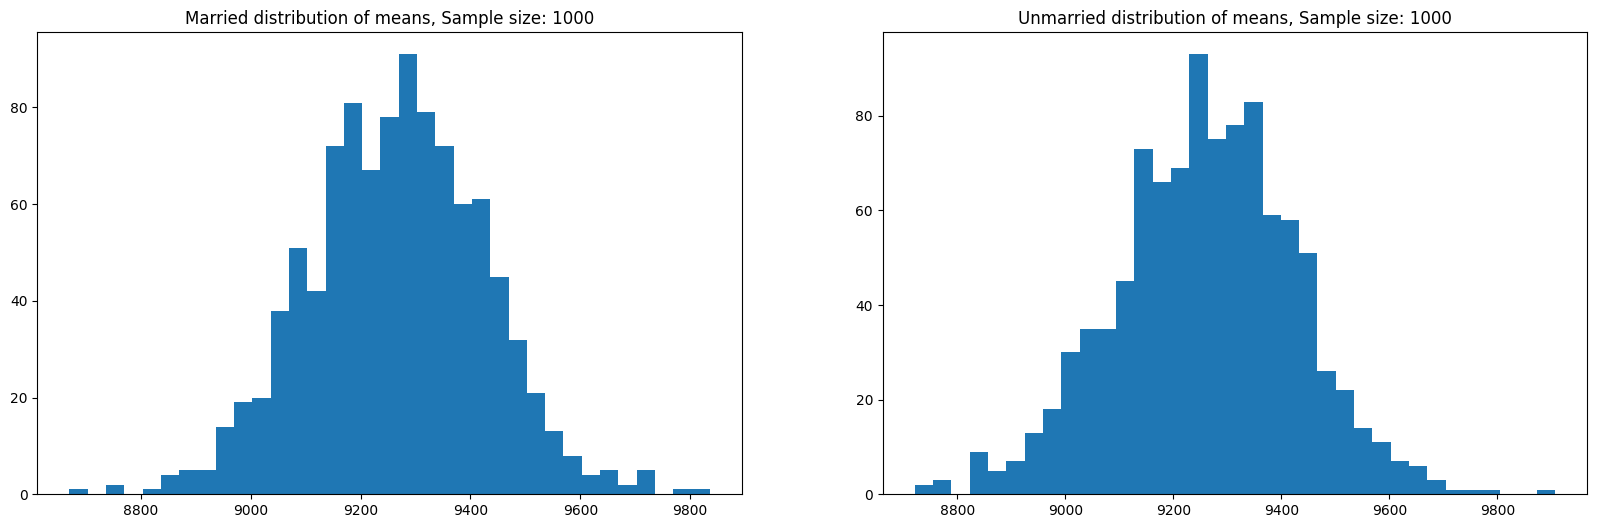

In [96]:


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_sample_mean, bins=35)
axis[1].hist(unmarried_sample_mean, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.


CLT and Confidence interval considering marital status

In [97]:
#At 95% confidence interval
married_lower_range = np.mean(married_sample_mean) - 1.96 * np.std(married_sample_mean)
married_upper_range=np.mean(married_sample_mean) + 1.96 * np.std(married_sample_mean)

In [98]:
(married_lower_range,married_upper_range)

(8951.951291104915, 9577.954702895086)

In [100]:
unmarried_lower_range = np.mean(unmarried_sample_mean) - 1.96 * np.std(unmarried_sample_mean)
unmarried_upper_range=np.mean(unmarried_sample_mean) + 1.96 * np.std(unmarried_sample_mean)

In [101]:
(unmarried_lower_range,unmarried_upper_range)

(8932.271399240743, 9587.661462759259)

 At 95% confifedence level there overlapping between married and unmaaried people .we can't conclude who is spend total amount of purchase.

In [103]:
#At 90% confidence interval
married_lower_range = np.mean(married_sample_mean) - 1.645 * np.std(married_sample_mean)
married_upper_range=np.mean(married_sample_mean) + 1.645 * np.std(married_sample_mean)

In [104]:
(married_lower_range,married_upper_range)

(9002.255136695196, 9527.650857304805)

In [106]:
unmarried_lower_range = np.mean(unmarried_sample_mean) - 1.645 * np.std(unmarried_sample_mean)
unmarried_upper_range=np.mean(unmarried_sample_mean) + 1.645 * np.std(unmarried_sample_mean)

In [107]:
(unmarried_lower_range,unmarried_upper_range)

(8984.936672202053, 9534.996189797948)

In [ ]:
#At 99% confidence level


In [109]:
married_lower_range = np.mean(married_sample_mean) - 2.57 * np.std(married_sample_mean)
married_upper_range=np.mean(married_sample_mean) + 2.57* np.std(married_sample_mean)

In [110]:
(married_lower_range,married_upper_range)

(8854.537494882465, 9675.368499117536)

In [111]:
unmarried_lower_range = np.mean(unmarried_sample_mean) - 2.57 * np.std(unmarried_sample_mean)
unmarried_upper_range=np.mean(unmarried_sample_mean) + 2.57 * np.std(unmarried_sample_mean)

In [112]:
(unmarried_lower_range,unmarried_upper_range)

(8830.28468017281, 9689.648181827191)

# Results when the same activity is performed for Age

In [116]:
_n=500
iteration=1000
age1_sample_mean=[df[df["Age"]=="0-17"].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(age1_sample_mean)

8930.633535

In [118]:
n=500
iteration=1000
age2_sample_mean=[df[df["Age"]=="18-25"].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(age2_sample_mean)

9157.72066

In [119]:
n=500
iteration=1000
age3_sample_mean=[df[df["Age"]=="26-35"].sample(n,replace=True)["Purchase"].mean() for i in range(iteration)]
np.mean(age3_sample_mean)

9266.996248

Average amount spent more by age group "18-25".

In [123]:
#calculate CLT at 99% confidence level
age1_lower_range = np.mean(age1_sample_mean) - 2.57 * np.std(age1_sample_mean)
age1_upper_range=np.mean(age1_sample_mean) + 2.57* np.std(age1_sample_mean)

In [124]:
(age1_lower_range,age1_upper_range)

(8515.121941431433, 9346.145128568569)

In [127]:
age2_lower_range = np.mean(age2_sample_mean) - 2.57 * np.std(age2_sample_mean)
age2_upper_range=np.mean(age2_sample_mean) + 2.57* np.std(age2_sample_mean)

In [128]:
(age2_lower_range,age2_upper_range)

(8599.155393468754, 9716.285926531247)

In [129]:
age3_lower_range = np.mean(age3_sample_mean) - 2.57 * np.std(age3_sample_mean)
age3_upper_range=np.mean(age3_sample_mean) + 2.57* np.std(age3_sample_mean)

In [130]:
(age3_lower_range,age3_upper_range)

(8699.2279874901, 9834.7645085099)

With reference to the above data, at a 95% confidence interval:

a) The highest average amount spent by 26- to 35-year-old customers.
it is clear that the age group 26 to 35 spends more compared to other age categories.

Confidence intervals for average 26- to 35-year-old and 36- to 45-year-old spending are not overlapping.

# Recommendations

 The company should target the age category between 26 and 35, as they spend more money compared to others.

1) Men spend more money than women, so the company should focus on retaining male customers and getting more male customers.

2) Product Category: 5, 1, and 8 have the highest purchasing frequency.
It means the products in these categories are liked more by customers.
The company can focus on selling more of these products.

3) Product Category: 11, 2, and 6, 3 have almost close competition in purchasing.

The company can focus on selling more of these products.

4) Unmarried customers spend more money compared to married customers. So the company should focus on retaining the unmarried customers and getting more unmarried customers.

5) Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.